Engine start took 8.759247064590454 seconds


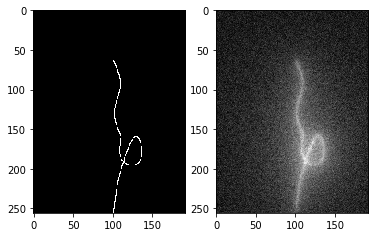

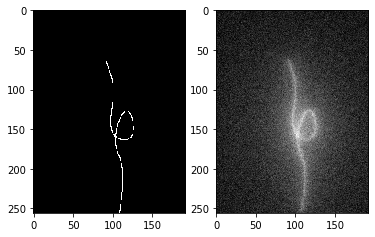

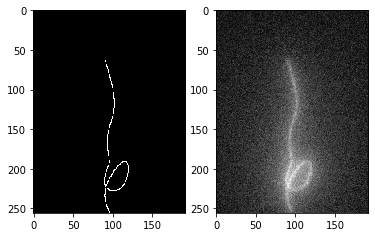

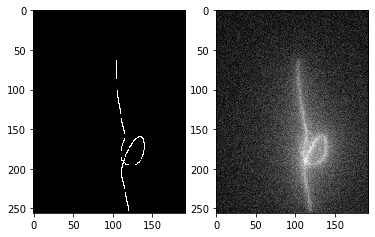

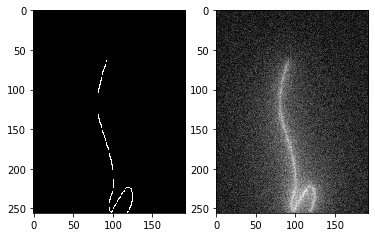

Simulation took 6.712214708328247 seconds


In [16]:
# python -m ipykernel install --user --name=my-virtualenv-name
import matlab.engine
import time
import matplotlib.pyplot as plt
import numpy as np

# Show data
eng_start = time.time()
eng = matlab.engine.start_matlab()
print('Engine start took', time.time() - eng_start, 'seconds')

data = []

sim_start = time.time()
for i in range(5):
    ground_truth, simulated = eng.simulate(0, nargout=2)
    
    plt.subplot(121)
    plt.imshow(ground_truth, cmap='gray')
    
    plt.subplot(122)
    plt.imshow(simulated, cmap='gray')
    plt.show()
    
# Most of the time is to set up the connection
print('Simulation took', time.time() - sim_start, 'seconds')

In [20]:
# Generate data
N = 50
train, test = [], []

for i in range(N):
    ground_truth, simulated = eng.simulate(0, nargout=2)
    train += [simulated]
    test += [ground_truth]
    
train, test = np.array(train), np.array(test)

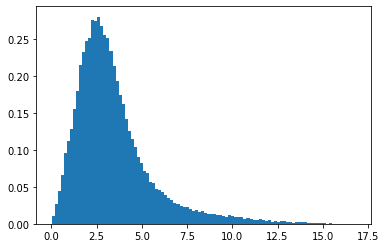

In [28]:
# Look at statistics of data
h2 = plt.hist(train[0].reshape(-1,1), bins = 100, density = True, alpha=1)

In [31]:
# Segment data
from sklearn.mixture import GaussianMixture

# The background and the wire
n_components = 2

model=GaussianMixture(n_components=n_components)

segmentations = []
for datum in train:
    features = datum.reshape(-1,1)

    fit = model.fit(features)
    segmentations += [model.predict(features).reshape(datum.shape)]

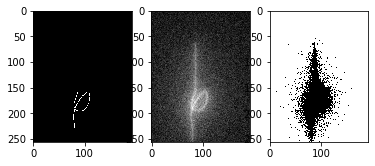

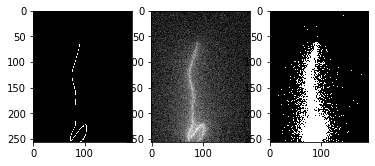

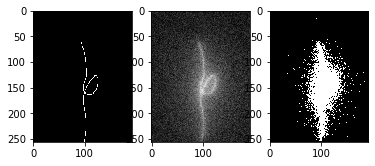

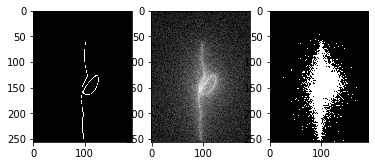

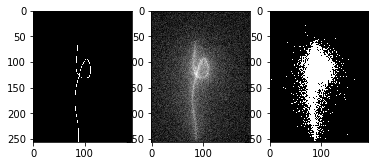

In [35]:
# Show first 5 segmentations
for i, (segmentation, ground_truth, simulated) in enumerate(list(zip(segmentations, test, train))[:5]):
    plt.subplot(131)
    plt.imshow(ground_truth, cmap='gray')
    
    plt.subplot(132)
    plt.imshow(simulated, cmap='gray')
    
    plt.subplot(133)
    plt.imshow(segmentation, cmap='gray')
    plt.show()